In [1]:
import numpy as np
import random
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
from plot_functions import *
from utilities import * 

# For autoreloading the imported moduls
%load_ext autoreload
%autoreload 2
device = 'cpu'


# Generate source domain dataset and target domain dataset

## Generate linear Gaussian dataset 

In [28]:
from linearDataGenerator import *
import os  

path = 'Data/LinearGaussian'
os.makedirs(path, exist_ok=True)  

pz1 = [1, 1]
pz2 = [0, 1]
pz3 = [-1, 1]
A = [1, 2 ,3, 4, 5]
B = [1, 2, 3, 4, 5]
N = 1500
lg1 = linear_data_generator(pz1, A, B, N)
lg2 = linear_data_generator(pz2, A, B, N)
lg3 = linear_data_generator(pz3, A, B, N)

lg1.to_csv(path+'/LG_N(1,1).csv')
lg2.to_csv(path+'/LG_N(0,1).csv')
lg3.to_csv(path+'/LG_N(-1,1).csv')

## Load linear Gaussian dataset

there are 1500 samles in source domain
there are 1500 samles in target domain


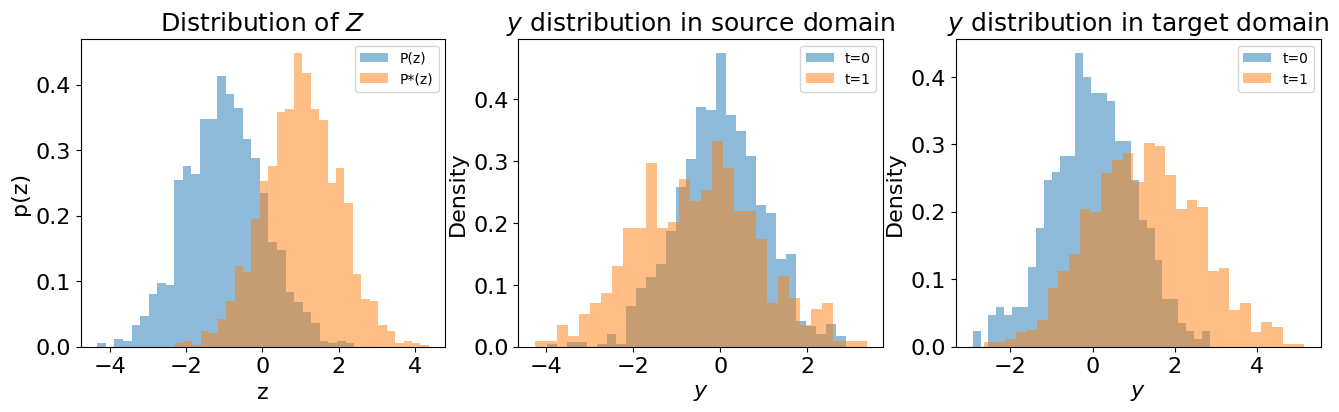

In [121]:
path = 'Data/LinearGaussian'
os.makedirs(path, exist_ok=True)  

path_source = path+'/LG_N(-1,1).csv'
path_target = path+'/LG_N(1,1).csv'
dist_z_source = [-1, 1]
dist_z_target = [1, 1]

source_data = pd.read_csv(path_source)
target_data = pd.read_csv(path_target)
source_data.drop("Unnamed: 0", axis=1, inplace=True)
target_data.drop("Unnamed: 0", axis=1, inplace=True)
print(f"there are {len(source_data)} samles in source domain")
print(f"there are {len(target_data)} samles in target domain")


plot_souce_target(source_data, target_data)

In [3]:
target_data.head()

,z,x0,x1,x2,x3,x4,t,y
0,1.021577,2.021577,4.043154,6.064731,8.086308,10.107885,1.0,1.687396
1,-0.608124,0.391876,0.783752,1.175628,1.567504,1.959380,0.0,0.173940
2,0.404041,1.404041,2.808082,4.212123,5.616163,7.020204,1.0,1.492954
3,3.945412,4.945412,9.890825,14.836237,19.781650,24.727062,1.0,4.245443
4,1.065240,2.065240,4.130481,6.195721,8.260962,10.326202,1.0,2.697951


# Train on the source domain dataset

In [122]:
from models import trainZTtoYmodel, trainXTtoYmodel, trainZtoXmodel, GenericDataset, RMSE_loss



## Train a NN for $p(y|x,t)$ using source domain data

Train loss in epoch 0 is 2399.409152984619
Train loss in epoch 1 is 2362.26900100708
Train loss in epoch 2 is 2322.177360534668
Train loss in epoch 3 is 2335.3987579345703
Train loss in epoch 4 is 2301.82954788208
Train loss in epoch 5 is 2276.731044769287
Train loss in epoch 6 is 2285.6824989318848
Train loss in epoch 7 is 2273.9604415893555
Train loss in epoch 8 is 2273.9360389709473
Train loss in epoch 9 is 2272.1258430480957
Train loss in epoch 10 is 2276.6702766418457
Train loss in epoch 11 is 2259.926212310791
Train loss in epoch 12 is 2265.4365997314453
Train loss in epoch 13 is 2274.9612007141113
Train loss in epoch 14 is 2257.4235458374023
Train loss in epoch 15 is 2268.0463790893555
Train loss in epoch 16 is 2280.046573638916
Train loss in epoch 17 is 2261.9875564575195
Train loss in epoch 18 is 2262.7135162353516
Train loss in epoch 19 is 2264.325370788574
Train loss in epoch 20 is 2266.7854537963867
Train loss in epoch 21 is 2277.0681762695312
Train loss in epoch 22 is 2265

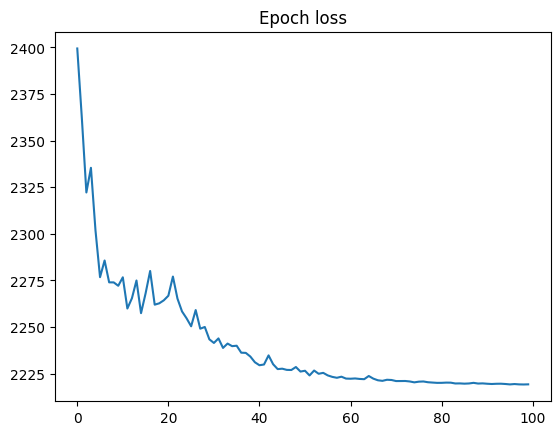

In [233]:
# using the NN that trained with lowerst loss 1210

py_xt = trainXTtoYmodel(device, source_data.iloc[:, 1:25], source_data['t'], source_data['y'],
                         lr_start=0.05, lr_end=0.045, num_epochs=100,layers=3, width=64,batch_size=32,
                         loss_type=2
                        )



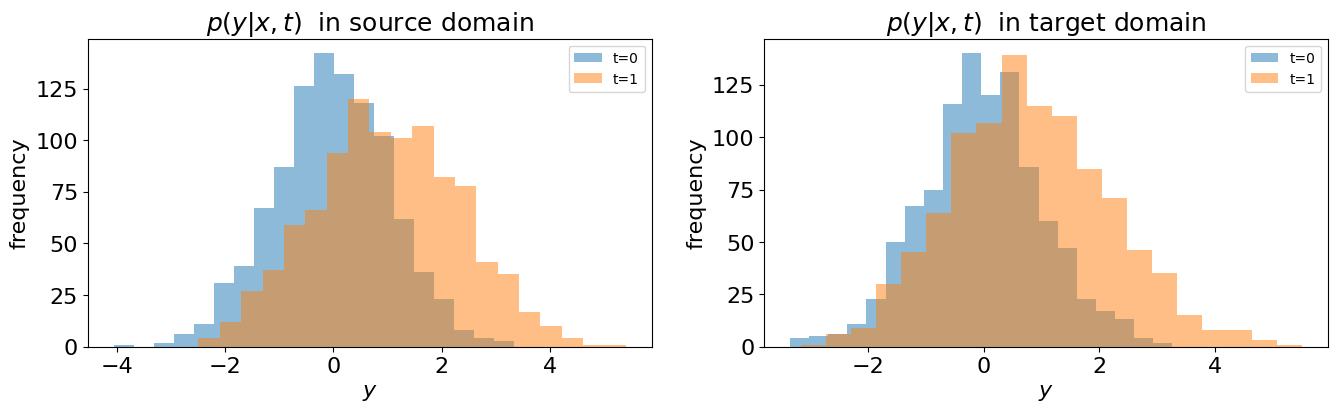

In [234]:
plot_py_xt(source_data, target_data, py_xt, num_test_sample=1000, loss_type=2)

## Train a NN for $p(y|z,t)$ using source domain data

Train loss in epoch 0 is 2439.5373764038086
Train loss in epoch 1 is 2160.732536315918
Train loss in epoch 2 is 2151.498977661133
Train loss in epoch 3 is 2139.707263946533
Train loss in epoch 4 is 2142.096179962158
Train loss in epoch 5 is 2138.3723907470703
Train loss in epoch 6 is 2153.211498260498
Train loss in epoch 7 is 2143.5520973205566
Train loss in epoch 8 is 2138.461181640625
Train loss in epoch 9 is 2139.365146636963
Train loss in epoch 10 is 2145.2038803100586
Train loss in epoch 11 is 2138.5636863708496
Train loss in epoch 12 is 2136.7132263183594
Train loss in epoch 13 is 2140.009796142578
Train loss in epoch 14 is 2156.0205268859863
Train loss in epoch 15 is 2154.8316650390625
Train loss in epoch 16 is 2140.8220596313477
Train loss in epoch 17 is 2127.853988647461
Train loss in epoch 18 is 2135.2102699279785
Train loss in epoch 19 is 2138.115203857422
Train loss in epoch 20 is 2140.399242401123
Train loss in epoch 21 is 2136.8136253356934
Train loss in epoch 22 is 2131.

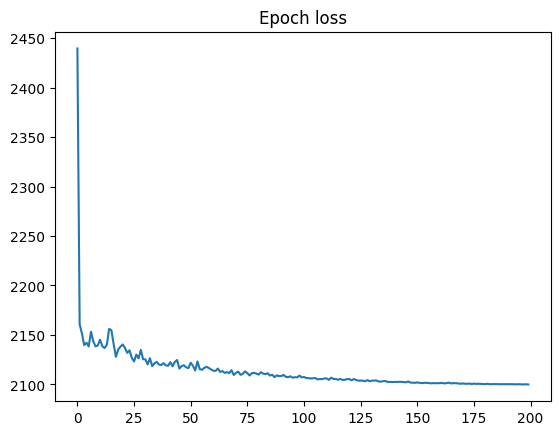

In [123]:
# train a MLP for p(y|z,t)
py_zt = trainZTtoYmodel(device, source_data['z'], source_data['t'], source_data['y'],
                         lr_start=0.05, lr_end=0.045, num_epochs=200,layers=1, width=10, loss_type=2, y_separate_heads=True)

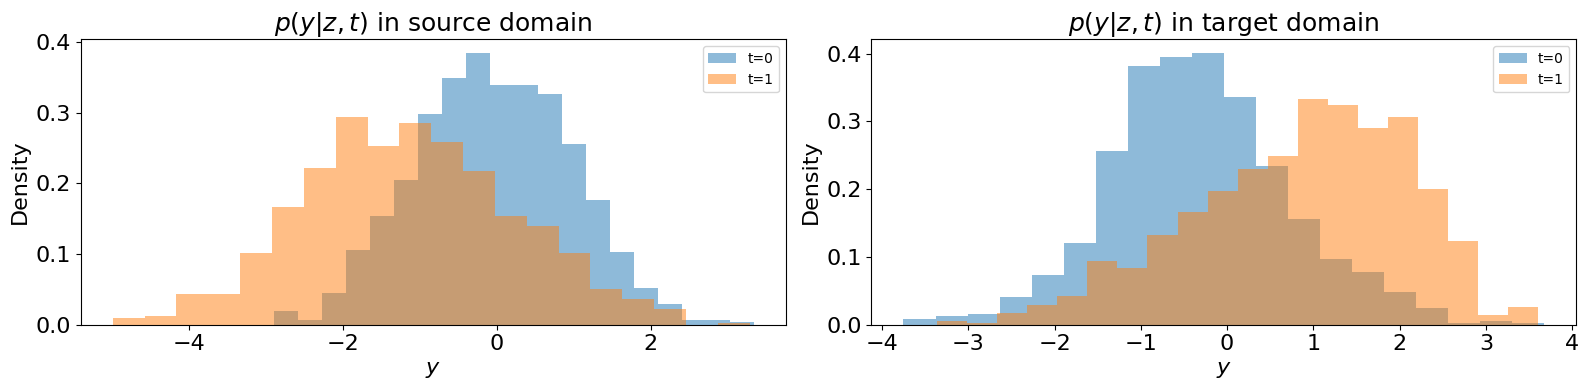

In [124]:
plot_py_zt(source_data, target_data, py_zt, num_test_sample=1000, loss_type = 2)
    

## Train a decoder for $p(x|z)$ using source domain data

Train loss in epoch 0 is 14958.19596862793
Train loss in epoch 1 is 13398.572387695312
Train loss in epoch 2 is 9050.462623596191
Train loss in epoch 3 is 9358.314483642578
Train loss in epoch 4 is 3639.948812484741
Train loss in epoch 5 is 5412.314300537109
Train loss in epoch 6 is 2679.2527408599854
Train loss in epoch 7 is 1549.2664813995361
Train loss in epoch 8 is -696.1856908798218
Train loss in epoch 9 is -3069.9051418304443
Train loss in epoch 10 is -4487.1716413497925
Train loss in epoch 11 is -4465.38876914978
Train loss in epoch 12 is -3889.5465002059937
Train loss in epoch 13 is -4710.765347957611
Train loss in epoch 14 is -7379.121562957764
Train loss in epoch 15 is -1692.3982000350952
Train loss in epoch 16 is -7405.027717590332
Train loss in epoch 17 is -5500.844211578369
Train loss in epoch 18 is -8433.207916259766
Train loss in epoch 19 is -10100.580486297607
Train loss in epoch 20 is -12793.441925048828
Train loss in epoch 21 is -10648.285837173462
Train loss in epoch

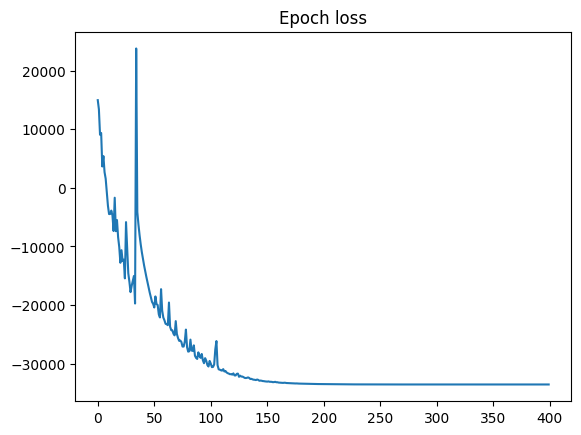

In [125]:
x_dim=5
z_dim=1
x_mode=[0]*5
z = source_data['z']
x = source_data.iloc[:, 1:x_dim+1] 


px_z = trainZtoXmodel(device, z , x , x_dim, z_dim, x_mode,
                         lr_start=0.03, lr_end=0.02
                         , num_epochs=400,layers=3, width=30)

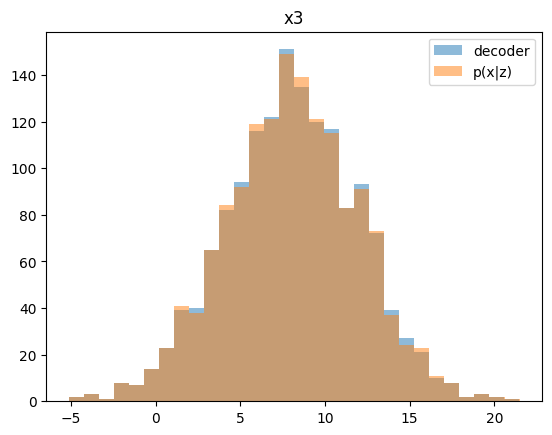

In [126]:
# plot the distribution of x_k generated by the decoder
plot_decoder(target_data, px_z, x_mode, x_dim, k=3
               
             
             )

## Train a VAE for the proxy $X$ using source domain data

In [81]:

source_data.head()

,z,x0,x1,x2,x3,x4,t,y
0,1.021577,2.021577,4.043154,6.064731,8.086308,10.107885,1.0,1.687396
1,-0.608124,0.391876,0.783752,1.175628,1.567504,1.959380,0.0,0.173940
2,0.404041,1.404041,2.808082,4.212123,5.616163,7.020204,1.0,1.492954
3,3.945412,4.945412,9.890825,14.836237,19.781650,24.727062,1.0,4.245443
4,1.065240,2.065240,4.130481,6.195721,8.260962,10.326202,1.0,2.697951


Epoch 0:
Epoch loss: 714.8482620563913
x: 646.4302504519198, y: 59.13929318367167, kld: 9.278713972644603
Epoch 1:
Epoch loss: 440.77543023292054
x: 385.17213926924035, y: 51.99926725346992, kld: 3.6040215111793357
Epoch 2:
Epoch loss: 433.251149279006
x: 380.5776263297872, y: 50.30329375571393, kld: 2.3702282322214003
Epoch 3:
Epoch loss: 430.41395536382146
x: 376.90894333859706, y: 49.9560158100534, kld: 3.5489967376627822
Epoch 4:
Epoch loss: 431.3487860497008
x: 377.9648723196476, y: 49.476269661112035, kld: 3.907643734140599
Epoch 5:
Epoch loss: 431.87663366439494
x: 377.86048012591425, y: 49.509041076010845, kld: 4.507112990034387
Epoch 6:
Epoch loss: 428.4437924648853
x: 373.5283112221576, y: 49.31622103427319, kld: 5.599258225014869
Epoch 7:
Epoch loss: 421.8378321870844
x: 361.7366365473321, y: 48.81391257428108, kld: 11.287284709037618
Epoch 8:
Epoch loss: 410.5537830109292
x: 344.6698231798537, y: 48.59226210573886, kld: 17.291697583300003
Epoch 9:
Epoch loss: 404.6670454309

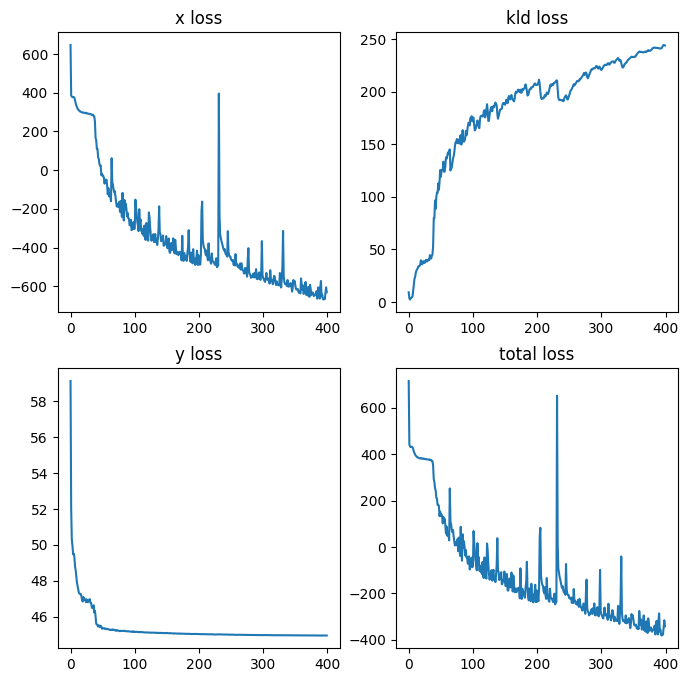

In [128]:
from models import GenericDataset, train_ProxyVAE
from torch.utils.data import DataLoader

# get the training data (exclude z)
source_proxy = np.array(source_data.iloc[:, 1:])
dataset = GenericDataset(source_proxy)
dataloader = DataLoader(dataset, shuffle=True, batch_size=32)
device='cpu'
plot_curves=False
print_logs=True
num_epochs=400
lr_start=0.001
lr_end=0.0001
x_dim=5
z_dim=1
x_mode=[0]*5

source_VAE, losses = train_ProxyVAE(device, plot_curves, print_logs, 
                                  dataloader, num_epochs, lr_start, lr_end, 
                                  x_dim, z_dim, p_x_z_nn_layers=3, p_x_z_nn_width=30, 
                                  p_y_nn_layers = 1, p_y_nn_width=10,
                                  q_z_nn_layers=3, q_z_nn_width=30,
                                  x_mode=x_mode, y_loss_type = 2, y_separate_heads = True)

# Test on the target domain dataset

In [147]:
from models import ProxyVAE
from env import eva_causal, eva_random, eva_negative
from copy import deepcopy




seeds = [1,2,3,4,5]


N = 1000
#test_data = data.sample(N)        # target domain N(0, 1)
test_data = source_data.sample(N)

# Hyperparamer setting
beta = 0.1
vae_freq = 50
lr = 0.005
batch_size = 32
y_separate_heads = True
update_decoder = False

reward_causal_transDe_episodes = []
reward_causal_NoDe_episodes = []
reward_causal_sourceVAE_episodes = []
reward_negative_episodes = []
reward_random_episodes = []

regret_causal_transDe_episodes = []
regret_causal_NoDe_episodes = []
regret_causal_sourceVAE_episodes = []
regret_negative_episodes = []
regret_random_episodes = []

for i in range(5):

    seed = seeds[i]
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)


    target_VAE = ProxyVAE(x_dim, z_dim, device, p_x_z_nn_layers=3, 
                      p_x_z_nn_width=30, p_y_zt_nn_layers = 1, p_y_zt_nn_width=10, q_z_nn_layers=3, q_z_nn_width=30, x_mode=x_mode, y_loss_type=2, y_separate_heads=y_separate_heads)
    target_VAE_transD = ProxyVAE(x_dim, z_dim, device, p_x_z_nn_layers=3, 
                      p_x_z_nn_width=30, p_y_zt_nn_layers = 1, p_y_zt_nn_width=10, q_z_nn_layers=3, q_z_nn_width=30, x_mode=x_mode, y_loss_type=2, y_separate_heads=y_separate_heads)
    target_VAE_transD.decoder.x_nn = deepcopy(px_z)
    target_VAE_transD.decoder.y_nn = deepcopy(py_zt)

    source_vae = deepcopy(source_VAE)

    reward_causal_transDe, regret_causal_transDe, transVAE_z, true_z = eva_causal(test_data, target_VAE_transD, beta=beta, vae_freq=vae_freq, lr=lr, batch_size=batch_size, train = True, update_decoder=update_decoder)
    reward_causal_NoDe, regret_causal_NoDe, randomVAE_z, _ = eva_causal(test_data, target_VAE, beta=1, vae_freq=vae_freq, lr=lr, batch_size=batch_size, train=True)
    reward_causal_sourceVAE, regret_causal_sourceVAE, sourceVAE_z, _ = eva_causal(test_data, source_vae, beta=1, vae_freq=vae_freq, lr=lr, batch_size=batch_size, train=True)
    #reward_negative, regret_negative = eva_negative(test_data, py_xt, N)
    reward_random, regret_random = eva_random(test_data, N) 

    reward_causal_transDe_episodes.append(reward_causal_transDe)
    reward_causal_NoDe_episodes.append(reward_causal_NoDe)
    reward_causal_sourceVAE_episodes.append(reward_causal_sourceVAE)
    #reward_negative_episodes.append(reward_negative)
    reward_random_episodes.append(reward_random)

    regret_causal_transDe_episodes.append(regret_causal_transDe)
    regret_causal_NoDe_episodes.append(regret_causal_NoDe)
    regret_causal_sourceVAE_episodes.append(regret_causal_sourceVAE)
    #regret_negative_episodes.append(regret_negative)
    regret_random_episodes.append(regret_random) 




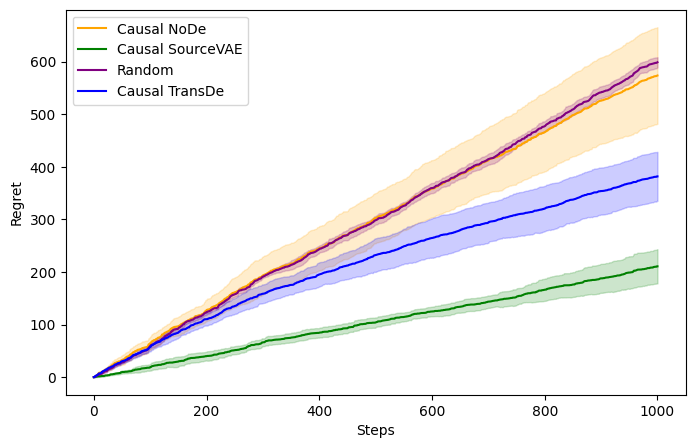

In [149]:
# ploting the regret
from plot_functions import plot_regret

plot_regret(regret_causal_transDe_episodes, regret_causal_NoDe_episodes, regret_causal_sourceVAE_episodes, regret_negative_episodes, regret_random_episodes, dist_z_source=dist_z_source, dist_z_target=dist_z_target)

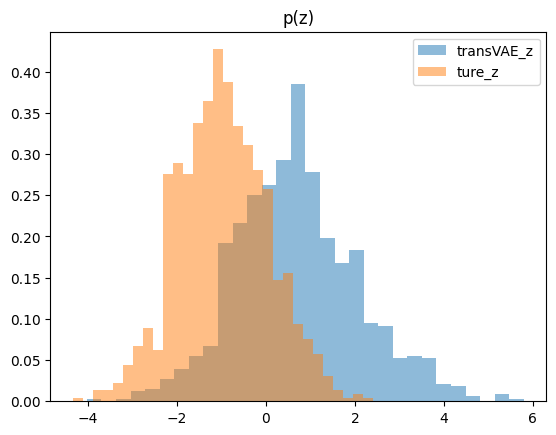

In [174]:
# ploting p(z) generated by VAE with transferred decoder
z = np.random.randn(1000)
z = [transVAE_z, true_z]
labels = ['transVAE_z', 'ture_z', 'randomVAE_z', 'sourceVAE_z']
plot_z_comparasion(z, labels)